In [2]:
# Cell 1: Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

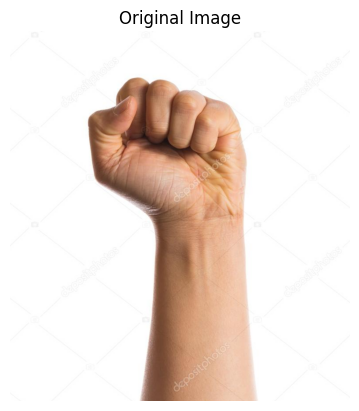

In [5]:
# Cell 2: Load the color image
# Replace 'path_to_image' with the actual path to your image.
image_path = './Web_Images_Processed_Versions/2024-12-05_13-14.png'
image = cv2.imread(image_path)

# Check if the image was loaded properly
if image is None:
    raise FileNotFoundError(f"The image at {image_path} could not be found. Please check the path.")

# Display the original image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

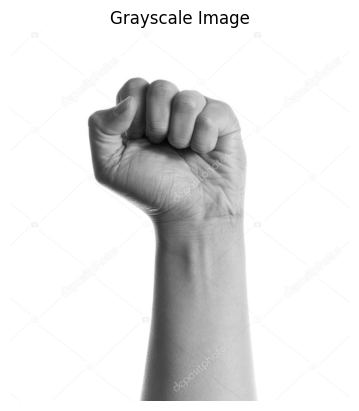

In [6]:
# Cell 3: Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

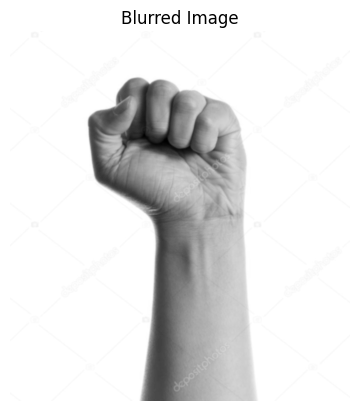

In [57]:
# Cell 4: Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Display the blurred image
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')
plt.show()


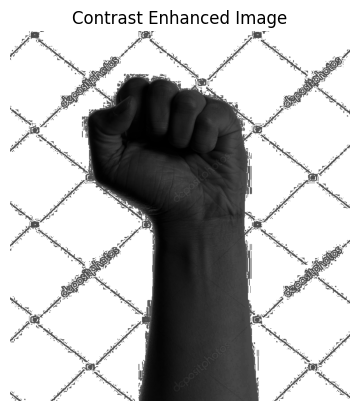

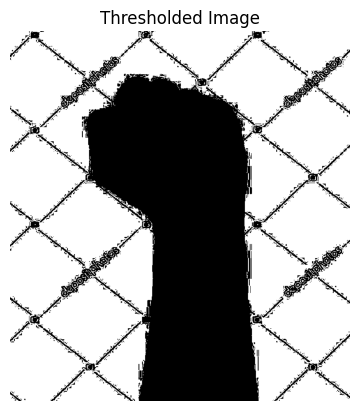

In [56]:
# Cell 5: Enhance contrast and use binary thresholding to simulate infrared-like features
# Apply Histogram Equalization to enhance contrast
equalized_image = cv2.equalizeHist(gray_image)

# Display the enhanced contrast image
plt.imshow(equalized_image, cmap='gray')
plt.title('Contrast Enhanced Image')
plt.axis('off')
plt.show()

# Use binary thresholding
_, thresholded_image = cv2.threshold(equalized_image, 100, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the thresholded image
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()

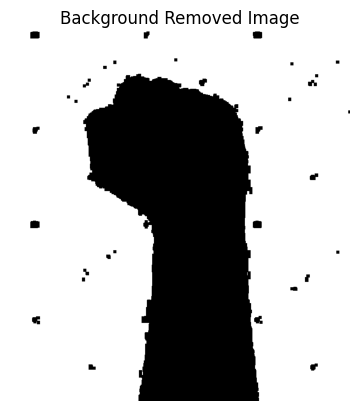

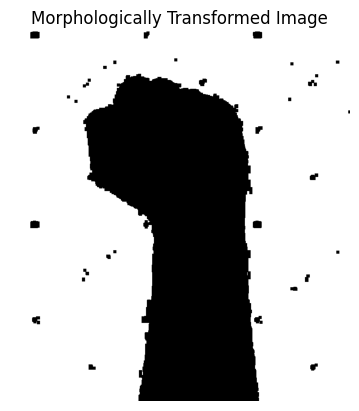

In [61]:
# Cell 6: Apply morphological operations (optional)
# This can help to remove small noises or fill in small holes in the hand region.
kernel = np.ones((5, 5), np.uint8)
morphed_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_CLOSE, kernel)

# Apply an additional erosion to further remove noise
kernel_erode = np.ones((3, 3), np.uint8)
morphed_image = cv2.erode(morphed_image, kernel_erode, iterations=1)  # 增加迭代次数

# Apply a more strict thresholding to remove background completely
_, morphed_image = cv2.threshold(morphed_image, 127, 255, cv2.THRESH_BINARY)

# Display the background-removed image
plt.imshow(morphed_image, cmap='gray')
plt.title('Background Removed Image')
plt.axis('off')
plt.show()  # 增加迭代次数

# Display the morphologically transformed image
plt.imshow(morphed_image, cmap='gray')
plt.title('Morphologically Transformed Image')
plt.axis('off')
plt.show()

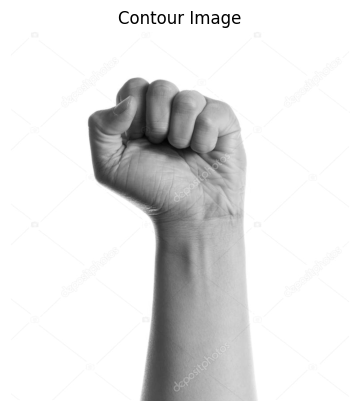

In [62]:
# Find contours and draw them on the original grayscale image
contours, _ = cv2.findContours(morphed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter out small contours by area
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 1000]  # 设置阈值为1000，可根据实际情况调整

contour_image = gray_image.copy()
cv2.drawContours(contour_image, filtered_contours, -1, (255, 255, 255), 2)

# Display the contour image
plt.imshow(contour_image, cmap='gray')
plt.title('Contour Image')
plt.axis('off')
plt.show()